<a href="https://colab.research.google.com/github/igvasilev/study-projects/blob/master/Project_1_Vasilev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network science
## Project 1
## Autor: Vasilev Igor

In [0]:
!pip install Networkx==1.9 --user

In [0]:
sys.version

'3.6.7 (default, Oct 22 2018, 11:32:17) \n[GCC 8.2.0]'

In [0]:
!pip install python-igraph

In [0]:
import numpy as np
import pandas as pd
import requests
import time
import collections
import json
import sys
import networkx as nx
import matplotlib.pyplot as plt
import scipy.spatial as spt
import igraph
%matplotlib inline 


In [0]:
import warnings
warnings.filterwarnings("ignore")

## 1 Network summary
### Network preprocessing

I choose to analyse my VK network with corresponding API

In [0]:
token = 'cf203bf90182bba055c9000304b17434f05abf6351f597ce934c2aaf5bb2bb7372001780899afd7545a40'
uid = '97796283'

def getFriends(uid):
    req = 'https://api.vk.com/method/friends.get?fields=sex,city,education&uid=%s&v=5.92&lang=en&access_token=%s' %(uid ,token)
    res = requests.get(req).json()
    friends = res['response']['items']
    return friends

In [0]:
# функция возвращает список друзей
def get_friends_ids(user_id):
    friends_url = 'https://api.vk.com/method/friends.get?user_id={0}&access_token={1}&v=5.92' 
    # также вы можете добавить access_token в запрос, получив его через OAuth 2.0
    json_response = requests.get(friends_url.format(user_id, token)).json()
    if json_response.get('error'):
        #print json_response.get('error')
        return list()
    return json_response[u'response']

def get_mutual_friends_id(source_uid, target_uid):
    friends_url = 'https://api.vk.com/method/friends.getMutual?source_uid={0}&target_uid={1}&access_token={2}&v=5.92' 
    # также вы можете добавить access_token в запрос, получив его через OAuth 2.0
    json_response = requests.get(friends_url.format(source_uid, target_uid, token)).json()
    if json_response.get('error'):
        #print json_response.get('error')
        return list()
    return json_response[u'response']


In [0]:
friends = getFriends(uid)

[{'can_access_closed': True,
  'city': {'id': 1, 'title': 'Moscow'},
  'first_name': 'Kirill',
  'id': 50385,
  'is_closed': False,
  'last_name': 'Gomenyuk',
  'online': 0,
  'sex': 2},
 {'can_access_closed': True,
  'city': {'id': 1, 'title': 'Moscow'},
  'education_form': 'Full-time',
  'education_status': "Alumnus (Bachelor's)",
  'faculty': 474,
  'faculty_name': 'Факультет бизнеса и менеджмента (Бизнес-информатики, Логистики, Менеджмента)',
  'first_name': 'Alexey',
  'graduation': 2008,
  'id': 61996,
  'is_closed': False,
  'last_name': 'Tanikov',
  'online': 0,
  'sex': 2,
  'university': 128,
  'university_name': 'НИУ ВШЭ (ГУ-ВШЭ)'},
 {'can_access_closed': True,
  'city': {'id': 1, 'title': 'Moscow'},
  'education_form': 'Full-time',
  'education_status': "Student (Bachelor's)",
  'faculty': 1300,
  'faculty_name': 'Факультет молекулярной и химической физики',
  'first_name': 'Dmitry',
  'graduation': 2011,
  'id': 68755,
  'is_closed': True,
  'last_name': 'Lenkevich',
  'on

In [0]:
graph = {}
friend_ids = get_friends_ids('97796283')['items']   # ваш user id, для которого вы хотите построить граф друзей.
for friend_id in friend_ids:    
    graph[friend_id] = get_mutual_friends_id('97796283', friend_id)
    print ('Processing id: ', friend_id, len(graph[friend_id]) )

Processing id:  50385 26
Processing id:  61996 11
Processing id:  68755 54
Processing id:  97723 107
Processing id:  121106 12
Processing id:  158814 0
Processing id:  290931 8
Processing id:  422984 61
Processing id:  693390 20
Processing id:  795872 69
Processing id:  1059861 3
Processing id:  1248509 1
Processing id:  1342010 83
Processing id:  1461160 67
Processing id:  1555609 0
Processing id:  1708697 0
Processing id:  2281738 0
Processing id:  2328487 0
Processing id:  2332266 0
Processing id:  2545693 0
Processing id:  2590370 54
Processing id:  2785553 8
Processing id:  2841963 30
Processing id:  3016483 19
Processing id:  3095637 0
Processing id:  3471583 0
Processing id:  3615034 0
Processing id:  3692667 2
Processing id:  3917201 3
Processing id:  3960265 0
Processing id:  4221439 0
Processing id:  4239872 0
Processing id:  4300295 0
Processing id:  4503167 0
Processing id:  4603971 0
Processing id:  4645841 45
Processing id:  4714446 11
Processing id:  4884957 12
Processin

In [0]:
g = nx.Graph(directed=False)

In [0]:
# Создаем атрибутты узлов
friends = getFriends(uid)
name = {}
sex = {}
city = {}
university = {}
for f in friends:
    name[f['id']] = f['first_name'].strip() + f['last_name'].strip()
    
    if f['sex']:
        sex[f['id']] = f['sex']
    
    if 'city' in f.keys():
        city[f['id']] = f['city']['id']
        
    if 'university' in f.keys():
        university[f['id']] = f['university']
        
# соединяем друзей дружащих друг с другом        
for i in graph:
    g.add_node(i)
    for j in graph[i]:
        if i != j and i in friend_ids and j in friend_ids:
            g.add_edge(i, j)

nx.set_node_attributes(g, 'name', name)
nx.set_node_attributes(g, 'sex', sex)
nx.set_node_attributes(g, 'city', city)
nx.set_node_attributes(g, 'university', university)

In [0]:
# сохраняем
networkx.write_gml(g, "network.gml")

In [0]:
G = nx.read_gml('network.gml')

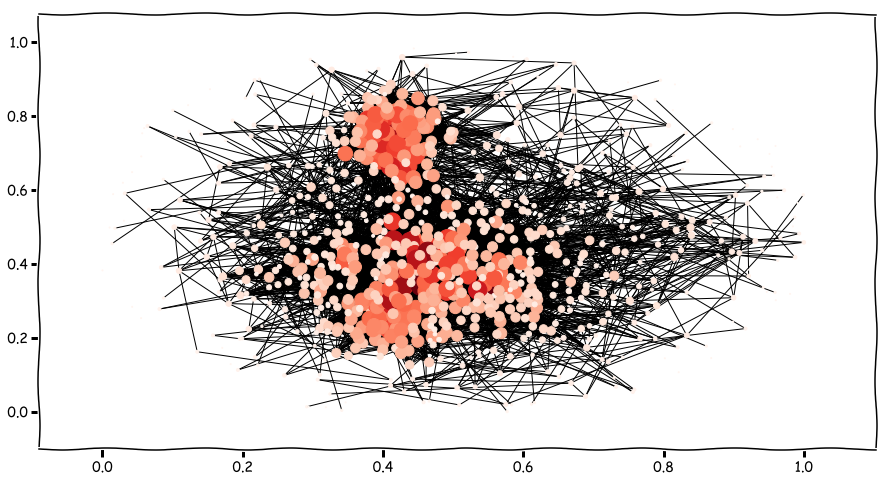

In [0]:
plt.xkcd()
k = nx.degree(G)

plt.figure(1, figsize=(15,8))
coord = nx.spring_layout(G, k = 0.3)
nx.draw_networkx(G,
                 pos=coord,
                 font_size=8,
                 nodelist=k.keys(),
                 node_size = [1 + 4*d for d in k.values()],
                 node_color=[10*c for c in k.values()],
                 cmap=plt.cm.Reds,
                 with_labels = False
                )

Seems that there are at least 2-3 communities and Giant Component include most of friends

In [0]:
CC0 = sorted(nx.connected_components(G), key = len, reverse=True)
SG = G.subgraph(CC0[0])
summary = pd.DataFrame({
        'Number of nodes': [int(len(G.nodes()))],
        'Number of edges': [int(len(G.edges()))],
        'Number of connected components': [int(nx.number_connected_components(G))],
        'Diameter of GC': [int(nx.diameter(SG))],
        'Radius of GC': [int(nx.radius(SG))],
        'Average clustering coefficient': [nx.average_clustering(G)],
        'Average_shortest_path_length': [nx.average_shortest_path_length(SG)],
        'Min node degree': [np.min(list(k.values()))],
        'Max node degree': [np.max(list(k.values()))],
        'Average node degree': [np.mean(list(k.values()))],
        'Transitivity coefficient': [nx.transitivity(G)]
    })

summary.rename(index={0:'Empirical data'}, inplace=True)
summary

,Average clustering coefficient,Average node degree,Average_shortest_path_length,Diameter of GC,Max node degree,Min node degree,Number of connected components,Number of edges,Number of nodes,Radius of GC,Transitivity coefficient
Empirical data,0.344928,20.761468,3.294963,9,113,0,46,9052,872,5,0.358465


* Average clustering coefficient is quite high that tell us that the average man has ~34% chance to be in some cluster
* Average path length of Giant component tell us that there are very close conection within the subgraph

In [0]:
print('Number of nodes in Connected components')
for i in range(len(CC0)):
    print('Component: ', i, 'has', len(CC0[i]), 'nodes')

Number of nodes in Connected components
Component:  0 has 827 nodes
Component:  1 has 1 nodes
Component:  2 has 1 nodes
Component:  3 has 1 nodes
Component:  4 has 1 nodes
Component:  5 has 1 nodes
Component:  6 has 1 nodes
Component:  7 has 1 nodes
Component:  8 has 1 nodes
Component:  9 has 1 nodes
Component:  10 has 1 nodes
Component:  11 has 1 nodes
Component:  12 has 1 nodes
Component:  13 has 1 nodes
Component:  14 has 1 nodes
Component:  15 has 1 nodes
Component:  16 has 1 nodes
Component:  17 has 1 nodes
Component:  18 has 1 nodes
Component:  19 has 1 nodes
Component:  20 has 1 nodes
Component:  21 has 1 nodes
Component:  22 has 1 nodes
Component:  23 has 1 nodes
Component:  24 has 1 nodes
Component:  25 has 1 nodes
Component:  26 has 1 nodes
Component:  27 has 1 nodes
Component:  28 has 1 nodes
Component:  29 has 1 nodes
Component:  30 has 1 nodes
Component:  31 has 1 nodes
Component:  32 has 1 nodes
Component:  33 has 1 nodes
Component:  34 has 1 nodes
Component:  35 has 1 no

In [0]:
networkx.write_graphml(G, 'graph.graphml')

In [0]:
def pdf_show(G):
    degrees = {}
    for n in G.nodes_iter():
        d = G.degree(n)
        if d in degrees:
            degrees[d] += 1
        else:
            degrees[d] = 1
    return degrees

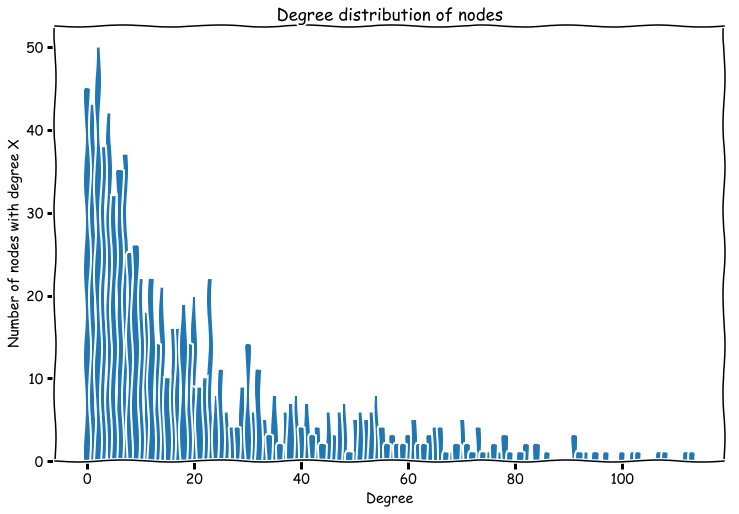

In [0]:
plt.figure(figsize=(12,8))
degG = pdf_show(G)
plt.bar(list(degG.keys()), list(degG.values()));
plt.title('Degree distribution of nodes');
plt.xlabel('Degree')
plt.ylabel('Number of nodes with degree X')
plt.show();

## 2 Structural analisys

In [0]:
# Degree/ Closeness/ Betweenness centralities. Top nodes interpretatiom
def drawCentralityGraph(centr, SG):
    temp ={}
    top10 = sorted(centr.values(), reverse = True)[:10]
    for key in centr:
        if centr[key] in top10:
            temp[key] = centr[key]
        
    H = SG.subgraph(temp.keys())

    plt.figure(1, figsize=(10,7));
    pos = nx.spring_layout(H, k = 2);
    nx.draw(H, 
            pos,
            node_size = [c*7000 for c in temp.values()],
            node_color=list(temp.values()),
            font_color='red',
            cmap=plt.cm.Reds,
            font_size=8,
            with_labels = False
           );

    node_labels = nx.get_node_attributes(H,'name');
    nx.draw_networkx_labels(H, pos, labels = node_labels);
    

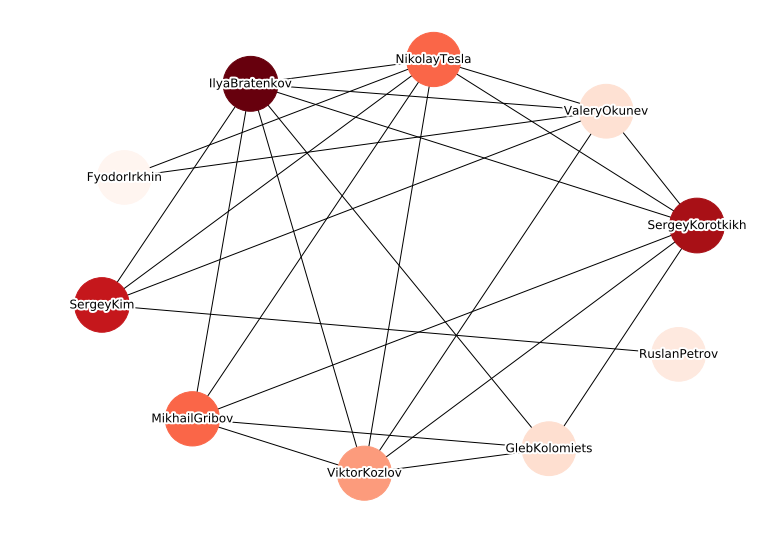

In [0]:
# Closeness centrality
cc = nx.closeness_centrality(SG)
drawCentralityGraph(cc, SG)

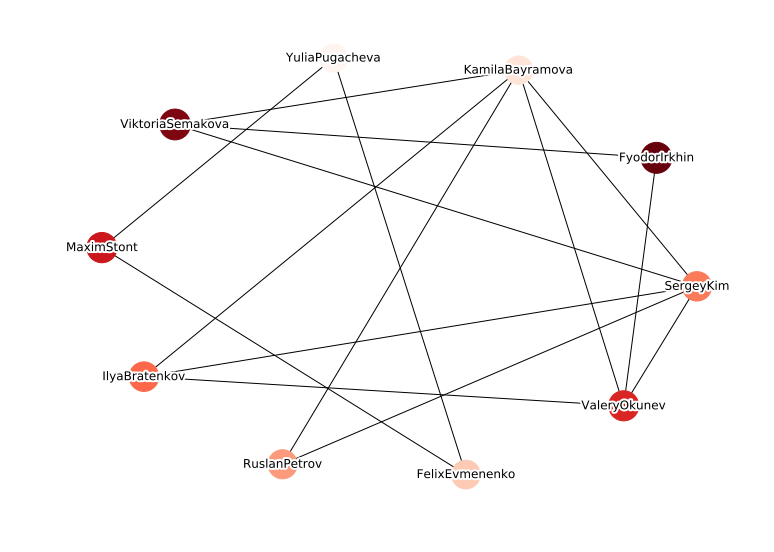

In [0]:
# Degree centrality
dc = nx.degree_centrality(SG)
drawCentralityGraph(dc, SG)

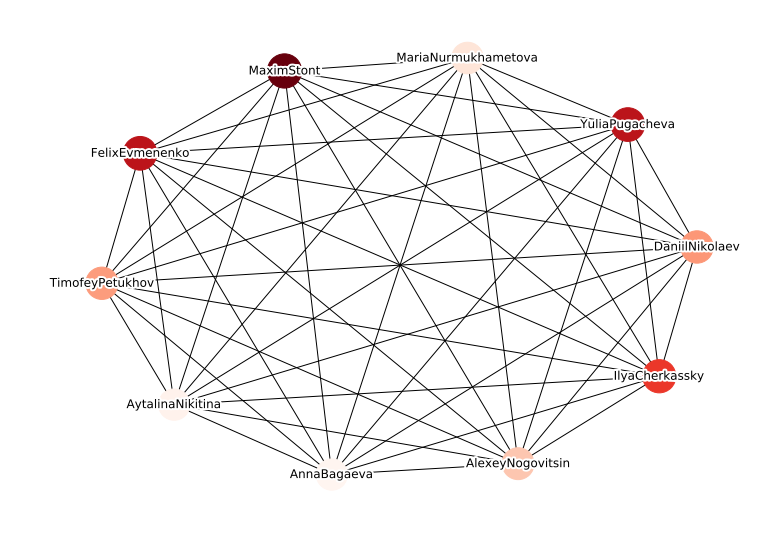

In [0]:
#Eigvector centrality
eig = nx.eigenvector_centrality(SG)
drawCentralityGraph(eig, SG)

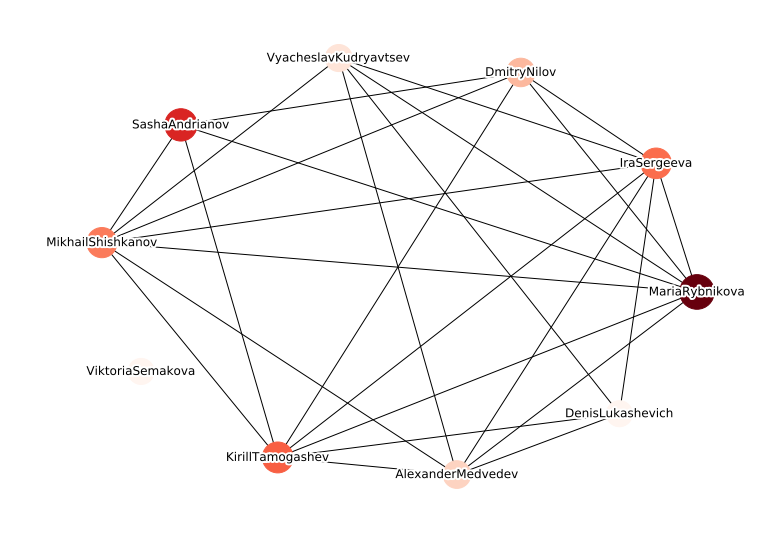

In [0]:
# Katz centrality
katz = nx.katz_centrality_numpy(SG)
drawCentralityGraph(katz, SG)

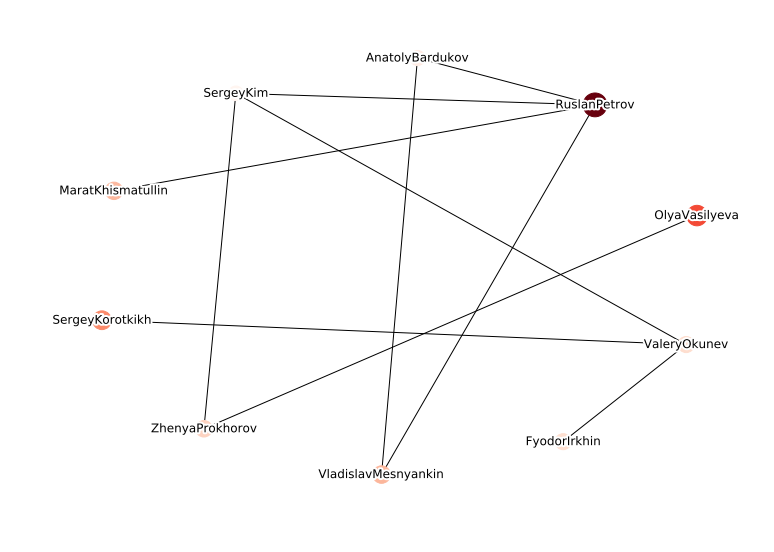

In [0]:
# Local load centrality
local = nx.load_centrality(SG)
drawCentralityGraph(local, SG)

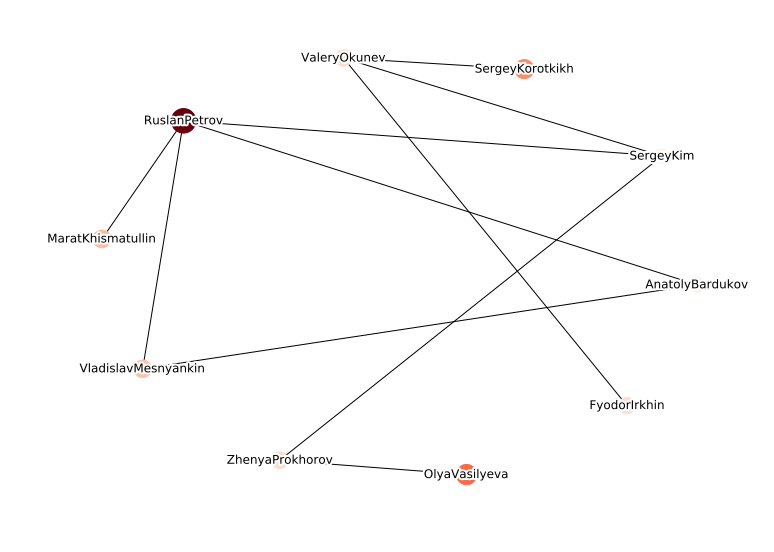

In [0]:
# Betwenness centrality
bc = nx.betweenness_centrality(SG)
drawCentralityGraph(bc, SG)

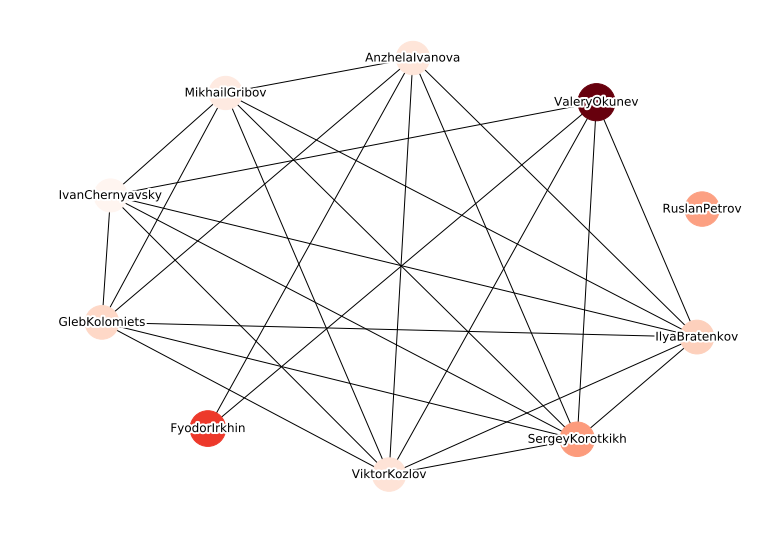

In [0]:
pg = nx.pagerank_numpy(SG, alpha = 0.1)
drawCentralityGraph(pg, SG)

In [0]:
# Let`s look at network structure
def plotDist(A):
    
    f, ax = plt.subplots(2, 2, figsize=(10,10))
    ax[0, 0].imshow(A, cmap = 'Greys', interpolation = 'None')
    ax[0, 0].set_title('Adjacency Matrix')
    
    D = np.corrcoef(A)
    ax[1, 0].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[1, 0].set_title('Correlation coeff.')
    
    dVec = spt.distance.pdist(A, metric = 'euclidean')
    D = spt.distance.squareform(dVec)
    ax[0, 1].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[0, 1].set_title('Euclidean Dist.')
    
    dVec = spt.distance.pdist(A, metric = 'cosine')
    D = spt.distance.squareform(dVec)
    ax[1, 1].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[1, 1].set_title('Cosine Dist.')

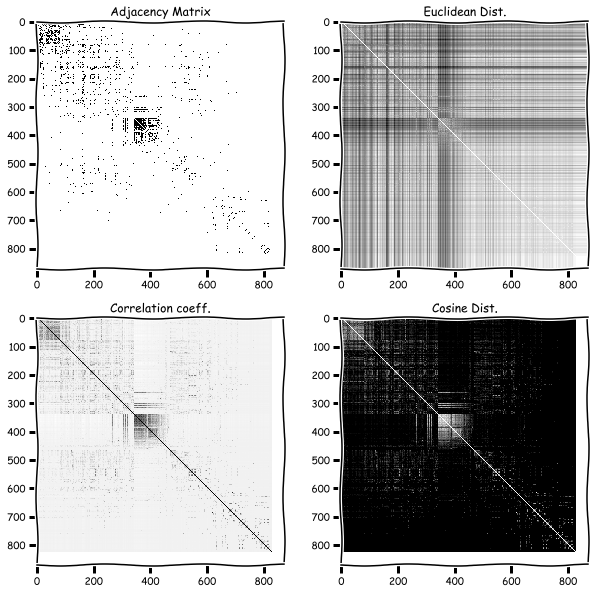

In [0]:
A = nx.to_numpy_matrix(G, dtype=int)
A = np.asarray(A)

plotDist(A)

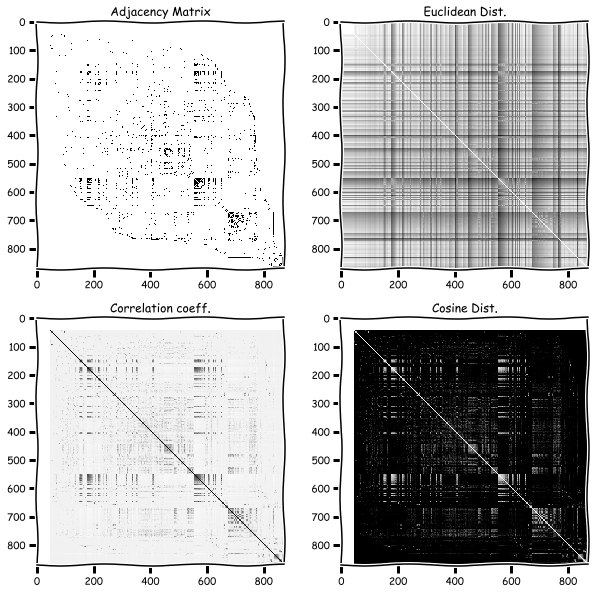

In [0]:
# Let`s reorder Adjandency matrix to provide a better view on network`s adjandency matrix
# run procedure

rcm = list(nx.utils.reverse_cuthill_mckee_ordering(G))
A = nx.adjacency_matrix(G, nodelist=rcm) 
A = A.toarray()
plotDist(A)


Matrix is sparce. But despite this fact it has some structure

In [0]:
# Assortative mixing
as_sex = nx.assortativity.attribute_assortativity_coefficient(G, 'sex')
as_sex_dict = nx.assortativity.attribute_mixing_dict(G, 'sex')

as_city = nx.assortativity.attribute_assortativity_coefficient(G, 'city')
as_city_dict = nx.assortativity.attribute_mixing_dict(G, 'city')

as_uni = nx.assortativity.attribute_assortativity_coefficient(G, 'university')
as_uni_dict = nx.assortativity.attribute_mixing_dict(G, 'university')
    

In [0]:
assortativity = pd.DataFrame({
        'Assortativity coefficient "sex"': [as_sex],
        'Assortativity coefficient "city"': [as_city],
        'Assortativity coefficient "university"': [as_uni]
    })

assortativity

,"Assortativity coefficient ""city""","Assortativity coefficient ""sex""","Assortativity coefficient ""university"""
0,0.060845,0.033987,0.142562


According to the table above tend to be assortative according to the choose characterisitcs. It is strongly assortative in case of "University" attribute. (Tendency to communicate with people with the same characteristics)

In [0]:
# Closest Random Graph model
n = nx.number_of_nodes(G)
m = nx.number_of_edges(G)

In [0]:
def getSummary(Gr):
    k = nx.degree(Gr)
    CC0 = sorted(nx.connected_components(Gr), key = len, reverse=True)
    SG = Gr.subgraph(CC0[0])
    summary = pd.DataFrame({
        'Number of nodes': [int(len(Gr.nodes()))],
        'Number of edges': [int(len(Gr.edges()))],
        'Number of connected components': [int(nx.number_connected_components(Gr))],
        'Diameter of GC': [int(nx.diameter(SG))],
        'Radius of GC': [int(nx.radius(SG))],
        'Average clustering coefficient': [nx.average_clustering(Gr)],
        'Average_shortest_path_length': [nx.average_shortest_path_length(SG)],
        'Min node degree': [np.min(list(k.values()))],
        'Max node degree': [np.max(list(k.values()))],
        'Average node degree': [np.mean(list(k.values()))],
        'Transitivity coefficient': [nx.transitivity(Gr)]
        })
    return summary

In [0]:
ER = nx.gnm_random_graph(n,m)
E = getSummary(ER)
E.name = 'Erdos-Reni'    
summary = summary.append(E)
summary.rename(index={0:'Erdos-Reni'}, inplace=True)

In [0]:
BA = nx.barabasi_albert_graph(n,3)
B = getSummary(BA)
B.name = 'Barabasi-Albert'    
summary = summary.append(B)
summary.rename(index={0:'Barabasi-Albert'}, inplace=True)

In [0]:
ps = np.arange(0.1, 1.0, 0.2)
for p in ps:
    WS = nx.watts_strogatz_graph(n, 20, p)             
    W = getSummary(WS)
    W.name = 'Watts-Strogats'
    summary = summary.append(W)
    summary.rename(index={0:'Watts-Strogats(p={})'.format(round(p, 1))}, inplace=True)

In [0]:
# Seems that it is a best parameter
p = 0.23
WS = nx.watts_strogatz_graph(n, 20, p)             
W = getSummary(WS)
W.name = 'Watts-Strogats'
summary = summary.append(W)
summary.rename(index={0:'Watts-Strogats(p={})'.format(round(p, 2))}, inplace=True)

In [0]:
summary

,Average clustering coefficient,Average node degree,Average_shortest_path_length,Diameter of GC,Max node degree,Min node degree,Number of connected components,Number of edges,Number of nodes,Radius of GC,Transitivity coefficient
Empirical data,0.344928,20.761468,3.294963,9,113,0,46,9052,872,5,0.358465
Erdos-Reni,0.023096,20.761468,2.571027,4,39,8,1,9052,872,3,0.023203
Barabasi-Albert,0.030153,5.979358,3.445518,6,76,3,1,2607,872,3,0.020129
Watts-Strogats(p=0.1),0.527159,20.000000,3.152609,5,25,15,1,8720,872,4,0.522810
Watts-Strogats(p=0.3),0.254550,20.000000,2.753713,4,29,14,1,8720,872,3,0.249802
Watts-Strogats(p=0.5),0.104955,20.000000,2.653791,4,30,11,1,8720,872,3,0.102813
Watts-Strogats(p=0.7),0.039492,20.000000,2.610023,4,32,11,1,8720,872,3,0.039390
Watts-Strogats(p=0.9),0.022041,20.000000,2.598716,4,30,12,1,8720,872,3,0.022058
Watts-Strogats(p=0.23),0.344233,20.000000,2.837575,4,28,15,1,8720,872,4,0.338474


## 3 Community Detection

In [0]:
def drawGraph(G,colors):
    plt.figure(1, figsize=(25,15))
    pos = nx.spring_layout(G)
    nx.draw_networkx(G,
                     pos,
                     node_color=list(colors.values()),
                     node_size = [d[1]*100 for d in G.degree()]
                     )

def communityDetection(G):
    colors = {}
    c = list(nx.enumerate_all_cliques(G))
    
    print(f'largest clique:{c[-1]}')
    
    for i in G.nodes():
        if(i in c[-1]):
            colors[i] = 'yellow'
        else:
            colors[i] = 'red'
    drawGraph(G,colors)
    
    nx.write_gml(G,'socialnetwork')
    
    G2 = igraph.load('socialnetwork',format = 'gml')
    
    labels = G2.vs['label']
    
    p = igraph.plot(G2.community_multilevel(), mark_groups = True,vertex_label = labels)
    p.save('community1.png')
    
    
    p = igraph.plot(G2.community_walktrap(), mark_groups = True,vertex_label = labels)
    p.save('community2.png')
    
    p = igraph.plot(G2.community_optimal_modularity(), mark_groups = True,vertex_label = labels)
    p.save('community3.png')

In [0]:
communityDetection(G)